In [5]:
import json

with open('/content/p1.json', 'r') as f:
    data = json.load(f)

print(data)

{'task_id': 'HumanEval/0', 'prompt': 'from typing import List\n\n\ndef has_close_elements(numbers: List[float], threshold: float) -> bool:\n    """ Check if in given list of numbers, are any two numbers closer to each other than\n    given threshold.\n    >>> has_close_elements([1.0, 2.0, 3.0], 0.5)\n    False\n    >>> has_close_elements([1.0, 2.8, 3.0, 4.0, 5.0, 2.0], 0.3)\n    True\n    """\n', 'entry_point': 'has_close_elements', 'canonical_solution': '    for idx, elem in enumerate(numbers):\n        for idx2, elem2 in enumerate(numbers):\n            if idx != idx2:\n                distance = abs(elem - elem2)\n                if distance < threshold:\n                    return True\n\n    return False\n', 'test': "\n\nMETADATA = {\n    'author': 'jt',\n    'dataset': 'test'\n}\n\n\ndef check(candidate):\n    assert candidate([1.0, 2.0, 3.9, 4.0, 5.0, 2.2], 0.3) == True\n    assert candidate([1.0, 2.0, 3.9, 4.0, 5.0, 2.2], 0.05) == False\n    assert candidate([1.0, 2.0, 5.9, 4.0

In [2]:
!pip install -q groq
from groq import Groq
from google.colab import userdata
gr = userdata.get('groq')
client = Groq(api_key=gr)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.8/135.8 kB 5.4 MB/s eta 0:00:00


In [44]:
def run_tests(candidate_function):
    """
    Correctly runs the HumanEval test string against a candidate function.
    """
    test_string = data['test']
    # This scope will hold the functions defined in the test_string
    exec_scope = {}

    try:
        # 1. Execute the test string. This defines the 'check' function
        #    within exec_scope.
        exec(test_string, {}, exec_scope)

        # 2. Retrieve the 'check' function from the scope
        check_function = exec_scope['check']

        # 3. Now, CALL the 'check' function with our candidate.
        #    This is where the asserts are actually run.
        check_function(candidate_function)

        print("✅ All test cases passed!")

    except AssertionError as e:
        # This will catch failures from the assert statements inside 'check'
        print(f"❌ Test case failed: {e}")
    except Exception as e:
        print(f"💥 An error occurred during testing: {e}")

#Qwen

##Qwen COT

In [45]:
client = Groq(api_key=gr)
completion = client.chat.completions.create(
    model="qwen/qwen3-32b",
    messages=[
      {
        "role": "system",
        "content": """You are an expert Python programming assistant. You must solve the given coding problem step by step.

Follow this exact output structure:

**APPROACH:**
1.  **Understand the requirements:** (Analyze the problem statement, inputs, outputs, and constraints).
2.  **Analyze the examples:** (Break down the provided examples to understand edge cases).
3.  **Plan the algorithms:** (Describe the logic for three different and distinct algorithms to solve the problem).
4.  **Implement the solutions:** (Write the code for the three algorithms).

**REQUIREMENTS:**
- You must provide three (3) different and distinct code solutions.
- Implement each function using the **exact signature** (parameters and return type) from the problem prompt.
- **CRITICAL: Name your three functions `test1`, `test2`, and `test3` respectively.**
- Include all necessary imports at the top of each code block.

**--- PLAN ---**
(Your detailed plan and reasoning for all three algorithms goes here.)

**--- SOLUTIONS ---**"""
      },
      {
        "role": "user",
        "content": data['prompt']
      }
    ],
    temperature=1,
    max_completion_tokens=4096,
    top_p=1,
    reasoning_effort="none",
    stream=True,
    stop=None
)

for chunk in completion:
    print(chunk.choices[0].delta.content or "", end="")

**APPROACH:**

1. **Understand the requirements:**  
   The function must XOR two input binary strings bit by bit and return the result as a new binary string. Each character in the input is from the set `{0, 1}`, and the XOR operation must be applied character-wise. If there is any mismatch in the lengths of the two input strings, the function should still correctly handle the input and process the characters up to the smaller length, ignoring the characters in the longer string beyond that point.

2. **Analyze the examples:**  
   For the given example `string_xor('010', '110') => '100'`, the XOR is calculated as:
   - 0 XOR 1 = 1
   - 1 XOR 1 = 0
   - 0 XOR 0 = 0 → Resulting in '100'.  
   Edge cases to consider:
   - Strings of different lengths.
   - Leading zeros in input.
   - All 1s or 0s.

3. **Plan the algorithms:**  
   We will use three different methods for solving this:
   - **Algorithm 1:** Manual character-wise XOR using `zip`.  
   - **Algorithm 2:** Using bit operatio

Code 1

In [53]:
from typing import List, Optional
from itertools import zip_longest


def string_xor_manual(a: str, b: str) -> str:
    """
    Algorithm 1: Character-wise XOR using zip.
    """
    result = []
    for x, y in zip(a, b):
        result.append('1' if x != y else '0')
    return ''.join(result)

In [54]:
run_tests(string_xor_manual)

✅ All test cases passed!


Code 2

In [55]:
def string_xor_bitwise(a: str, b: str) -> str:
    """
    Algorithm 2: Using integer bit xor.
    """
    a_int = int(a, 2)
    b_int = int(b, 2)
    xor = a_int ^ b_int
    return bin(xor)[2:]  # Strip "0b" prefix.

In [56]:
run_tests(string_xor_bitwise)

❌ Test case failed: 


Code 3

In [57]:
def string_xor_zip_longest(a: str, b: str) -> str:
    """
    Algorithm 3: Using itertools.zip_longest to handle different lengths.
    """
    result = []
    for x, y in zip_longest(a, b, fillvalue='0'):
        result.append('1' if x != y else '0')
    return ''.join(result)

In [58]:
run_tests(string_xor_zip_longest)

✅ All test cases passed!


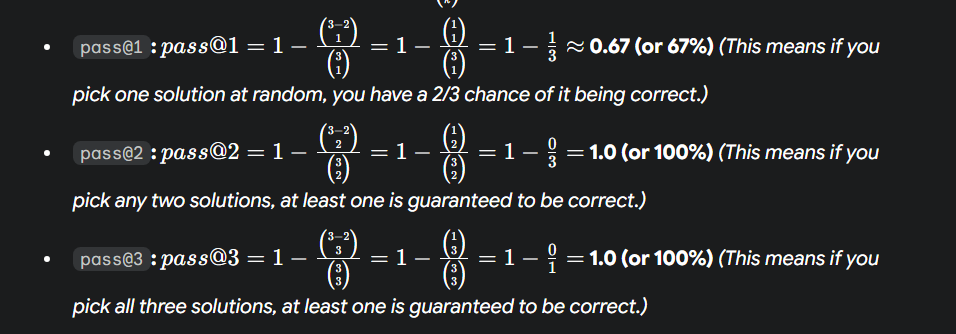

Qwen on Stepwise COT

In [60]:
client = Groq(api_key=gr)
completion = client.chat.completions.create(
    model="qwen/qwen3-32b",
    messages=[
      {
        "role": "system",
        "content": """You are an expert Python programmer. You must solve the given problem systematically.

Follow this exact output structure:

**SYSTEMATIC APPROACH:**
* **Step 1: Understand the requirements:** (Analyze the problem statement, inputs, outputs, and constraints).
* **Step 2: Analyze the examples:** (Break down the docstring examples to find edge cases).
* **Step 3: Plan the algorithms:** (Describe the logic for three different and distinct algorithms to solve the problem).
* **Step 4: Implement the solutions:** (Provide the final code for all three algorithms below).
"""
      },
      {
        "role": "user",
        "content": data['prompt']
      }
    ],
    temperature=1,
    max_completion_tokens=4096,
    top_p=1,
    reasoning_effort="none",
    stream=True,
    stop=None
)

for chunk in completion:
    print(chunk.choices[0].delta.content or "", end="")

**SYSTEMATIC APPROACH:**
* **Step 1: Understand the requirements:** We are given two binary strings (`a` and `b`) and are to compute their bitwise XOR, returning the result as another binary string. The key is to align the two inputs, pad them to the same length if necessary, and compute binary XOR digit by digit.
* **Step 2: Analyze the examples:** From the example `string_xor('010', '110') = '100'`, we know that XOR is computed bit by bit. If strings are unequal in length, we must align them by padding shorter ones with leading `0`s to avoid misalignment.
* **Step 3: Plan the algorithms:**  
  - **Algorithm 1:** Use Python’s `zip` function to iterate over the bits from both strings, perform XOR using built-in `^` with integer conversion, and construct the result.
  - **Algorithm 2:** Use bitwise operations without any loops, by padding strings with `0`s and XORing bit by bit with the `^` operator.
  - **Algorithm 3:** Process each character using manual string manipulation and bitwis

In [61]:
def string_xor(a: str, b: str) -> str:
    """
    Perform a bitwise XOR on two binary strings.
    """
    max_len = max(len(a), len(b))
    a_padded = a.zfill(max_len)
    b_padded = b.zfill(max_len)
    result = []
    for char_a, char_b in zip(a_padded, b_padded):
        result.append(str(int(char_a) ^ int(char_b)))
    return ''.join(result)

In [62]:
run_tests(string_xor)

✅ All test cases passed!


In [64]:
def string_xor2(a: str, b: str) -> str:
    """
    Perform a bitwise XOR on two binary strings.
    """
    max_len = max(len(a), len(b))
    a_padded = a.zfill(max_len)
    b_padded = b.zfill(max_len)
    result = [str(int(a_padded[i]) ^ int(b_padded[i])) for i in range(max_len)]
    return ''.join(result)

In [65]:
run_tests(string_xor2)

✅ All test cases passed!


In [66]:
def string_xor3(a: str, b: str) -> str:
    """
    Perform a bitwise XOR on two binary strings.
    """
    max_len = max(len(a), len(b))
    a_padded = a.zfill(max_len)
    b_padded = b.zfill(max_len)
    result = ''
    for i in range(max_len - 1, -1, -1):
        xor_val = int(a_padded[i]) != int(b_padded[i])
        result = str(int(xor_val)) + result
    return result

In [67]:
run_tests(string_xor3)

✅ All test cases passed!


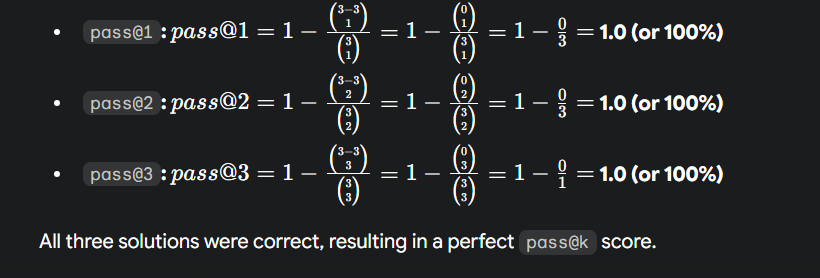

#Llama

##Llama COT

In [69]:
client = Groq(api_key=gr)
completion = client.chat.completions.create(
    model="llama-3.1-8b-instant",
    messages=[
      {
        "role": "system",
        "content": """You are an expert Python programming assistant. You must solve the given coding problem step by step.

Follow this exact output structure:

**APPROACH:**
1.  **Understand the requirements:** (Analyze the problem statement, inputs, outputs, and constraints).
2.  **Analyze the examples:** (Break down the provided examples to understand edge cases).
3.  **Plan the algorithms:** (Describe the logic for three different and distinct algorithms to solve the problem).
4.  **Implement the solutions:** (Write the code for the three algorithms).

**REQUIREMENTS:**
- Implement the function exactly as specified in the problem.
- Include all necessary imports.
- Ensure the code can handle all examples from the problem's docstring.
- You must provide three (3) different and distinct code solutions.

**--- PLAN ---**
(Your detailed plan and reasoning for all three algorithms goes here.)

**--- SOLUTIONS ---**"""
      },
      {
        "role": "user",
        "content": data['prompt']
      }
    ],
    temperature=1,
    max_completion_tokens=4096,
    top_p=1,
    stream=True,
    stop=None
)

for chunk in completion:
    print(chunk.choices[0].delta.content or "", end="")

**APPROACH:**

1.  **Understand the requirements:** The problem statement requires us to perform binary XOR operation on two input strings consisting of '1's and '0's, and return the result as a string. The input and output strings will be of the same length. We don't need to handle the case of strings of different lengths.

2.  **Analyze the examples:** Given example is '010', '110'. The expected output is '100'. It seems like a simple binary XOR operation. 

3.  **Plan the algorithms:** Since we are dealing with binary strings and we need to perform a bitwise XOR operation, we can't use Python's built-in `int()` function with base 2. Instead, we'll use basic string manipulation techniques. Here are three approaches:

    1.  **Approach 1: Convert strings to lists, perform XOR operation, and convert back to string**

    2.  **Approach 2: Use Python's built-in int function with base 2, perform XOR operation, and convert back to binary string**

    3.  **Approach 3: Perform XOR operat

Code 1

In [70]:
def string_xor_approach1(a: str, b: str) -> str:
    """ Input are two strings a and b consisting only of 1s and 0s.
    Perform binary XOR on these inputs and return result also as a string.
    >>> string_xor_approach1('010', '110')
    '100'
    """
    result = []
    for x, y in zip(a, b):
        result.append(str(int(x) ^ int(y)))
    return ''.join(result)

In [85]:
run_tests(string_xor_approach1)

✅ All test cases passed!


Code 2

In [72]:
from math import prod

def string_xor_approach2(a: str, b: str) -> str:
    """ Input are two strings a and b consisting only of 1s and 0s.
    Perform binary XOR on these inputs and return result also as a string.
    >>> string_xor_approach2('010', '110')
    '100'
    """
    result = bin(int(a, 2) ^ int(b, 2))[2:]
    return max(len(a), len(b)) * '0' + result[-max(len(a), len(b)):]

In [86]:
run_tests(string_xor_approach2)

❌ Test case failed: 


Code 3

In [74]:
def string_xor_approach3(a: str, b: str) -> str:
    """ Input are two strings a and b consisting only of 1s and 0s.
    Perform binary XOR on these inputs and return result also as a string.
    >>> string_xor_approach3('010', '110')
    '100'
    """
    return ''.join('1' if x != y else '0' for x, y in zip(a, b))

In [87]:
run_tests(string_xor_approach3)

✅ All test cases passed!


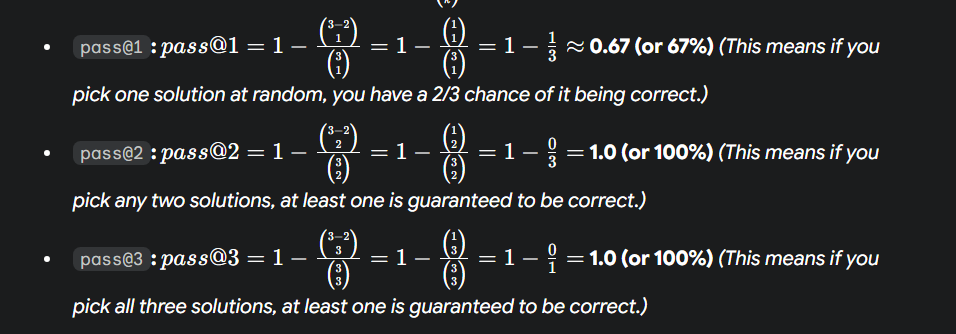

Qwen on Stepwise COT

In [77]:
client = Groq(api_key=gr)
completion = client.chat.completions.create(
    model="llama-3.1-8b-instant",
    messages=[
      {
        "role": "system",
        "content": """You are an expert Python programmer. You must solve the given problem systematically.

Follow this exact output structure:

**SYSTEMATIC APPROACH:**
* **Step 1: Understand the requirements:** (Analyze the problem statement, inputs, outputs, and constraints).
* **Step 2: Analyze the examples:** (Break down the docstring examples to find edge cases).
* **Step 3: Plan the algorithms:** (Describe the logic for three different and distinct algorithms to solve the problem).
* **Step 4: Implement the solutions:** (Provide the final code for all three algorithms below).
"""
      },
      {
        "role": "user",
        "content": data['prompt']
      }
    ],
    temperature=1,
    max_completion_tokens=4096,
    top_p=1,
    stream=True,
    stop=None
)

for chunk in completion:
    print(chunk.choices[0].delta.content or "", end="")

**SYSTEMATIC APPROACH:**
* **Step 1: Understand the requirements:** 
    - The function `string_xor` takes two string inputs `a` and `b`.
    - The inputs `a` and `b` are strings consisting only of 1s and 0s, representing binary numbers.
    - The function should perform a binary XOR operation on `a` and `b` and return the result as a string.
* **Step 2: Analyze the examples:**
    - The docstring example `string_xor('010', '110') -> '100'` indicates that the XOR operation is performed bit-wise.
    - The example shows that '0' XOR '0' is '0', '0' XOR '1' is '1', and '1' XOR '1' is '0'.
* **Step 3: Plan the algorithms:**

### Algorithm 1: Using a list comprehension
This algorithm will use a list comprehension to iterate over each character in the input strings and perform the XOR operation bit-wise.

### Algorithm 2: Using the built-in `int()` function to convert binary to decimal and back to binary
This algorithm will first convert the binary strings to decimal numbers, perform the XO

In [78]:
def algorithm_1(a: str, b: str) -> str:
        """ Perform binary XOR using a list comprehension """
        return ''.join('1' if x != y else '0' for x, y in zip(a, b))

In [79]:
run_tests(algorithm_1)

✅ All test cases passed!


In [81]:
def algorithm_2(a: str, b: str) -> str:
        """ Perform binary XOR using the int() function """
        return bin(int(a, 2) ^ int(b, 2))[2:]

In [82]:
run_tests(algorithm_2)

❌ Test case failed: 


In [83]:
def algorithm_3(a: str, b: str) -> str:
        """ Perform binary XOR using the zip() and map() functions """
        return ''.join(map(lambda x: '1' if x[0] != x[1] else '0', zip(a, b)))

In [84]:
run_tests(algorithm_3)

✅ All test cases passed!


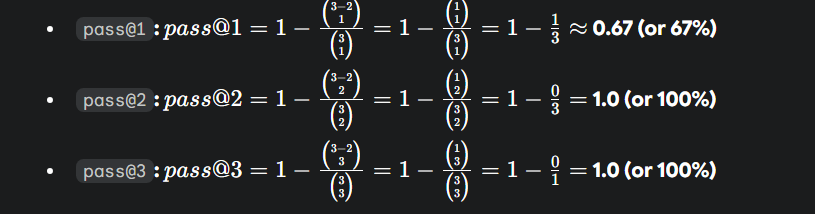